In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
# import basic libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
##Feature engineering


In [ ]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
cat_vars = ['Geography','Gender']

In [ ]:
encoded = pd.get_dummies(x[cat_vars],drop_first=True)

In [ ]:
# concatenate the encoded vars with the X dataset.
X = X.drop(['Geography','Gender'],axis=1)

In [ ]:
X = pd.concat([X,encoded],axis=1)

In [ ]:
# splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
## part 2 Now let's create the ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# let's initialize the ANN
classifier = Sequential()

In [ ]:
# adding the input layers
# number of input layers must be equal to the number of input colums in the x_train
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# adding the hidden layers
# there are methods to find out how many hidden layers are required for a problem, this is just an  assumed number of hidden layers.
# hidden layer 1
classifier.add(Dense(units=7,activation='relu'))
#classifier.add(Dropout(0.2))  # can be added to layers to add a dropout factor.
# hidden layer 2
classifier.add(Dense(units=6,activation='relu'))
#classifier.add(Dropout(0.2))  # can be added to layers to add a dropout factor.

In [ ]:
# adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
# the above codes has created a skeleton of the ANN model, further it needs to be compiled.

In [ ]:
classifier.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])

# adam optimizer uses the learning rate of 0.01, if we want to add our custom learning rate that is possible too as shown below. The only change in the curent code would be that instead of 'adam', 'opt' would be put as optimizers.

In [ ]:
#import tensorflow
#opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# early stopping makes sure that when the accuracy of the model is not increasing it automatically stops the training process.
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.5016 - accuracy: 0.7962 - val_loss: 0.4606 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4387 - accuracy: 0.7962 - val_loss: 0.4424 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4253 - accuracy: 0.7962 - val_loss: 0.4348 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4146 - accuracy: 0.7968 - val_loss: 0.4225 - val_accuracy: 0.7982
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4010 - accuracy: 0.8199 - val_loss: 0.4120 - val_accuracy: 0.8209
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3860 - accuracy: 0.8414 - val_loss: 0.4017 - val_accuracy: 0.8300
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3724 - accuracy: 0.8470 - val_loss: 0.3951 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

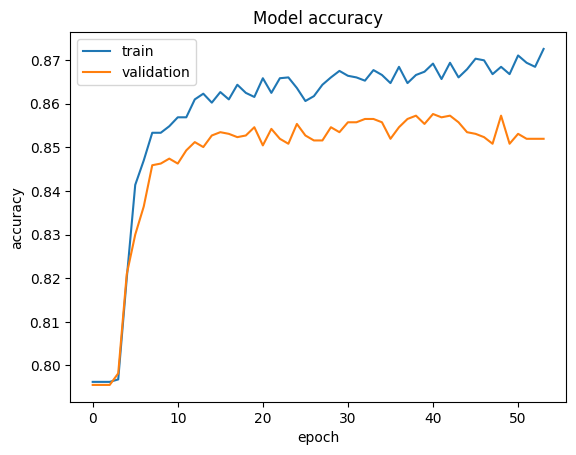

In [ ]:
# plot the summary of model history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

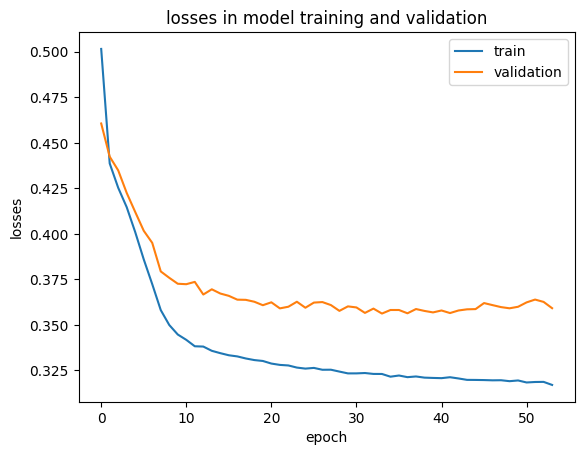

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['train','validation'])
plt.title("losses in model training and validation")
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [ ]:
# making predictions and evaluating the model
#predicting on test data
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[1515,   80],
       [ 202,  203]])

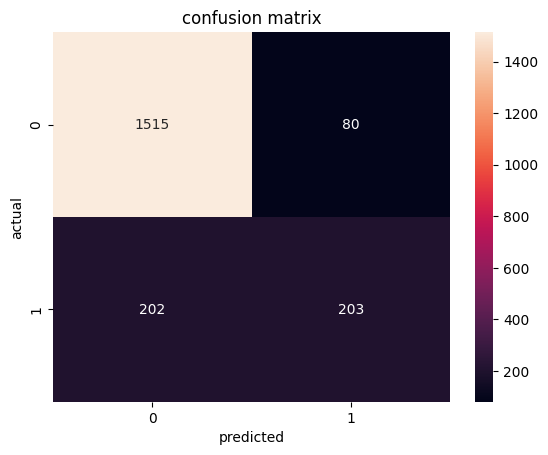

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True,fmt = 'g')
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [ ]:
print("The accuracy of the ANN model is : ",score*100,"%")

The accuracy of the ANN model is :  85.9 %
